<a href="https://colab.research.google.com/github/OhashiMarina/Projeto-Aplicado-IV/blob/main/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importação da base de dados

In [3]:
df = pd.read_csv("SP_poluicao_dados.csv")

#Avaliação primária dos dados

In [4]:
df.shape

(10980515, 10)

In [5]:
df.head()

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ID          int64  
 2   Data        object 
 3   Hora        object 
 4   Estacao     object 
 5   Codigo      object 
 6   Poluente    object 
 7   Valor       float64
 8   Unidade     object 
 9   Tipo        object 
dtypes: float64(1), int64(2), object(7)
memory usage: 837.7+ MB


In [7]:
df.describe(include='all')

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
count,1.098052e+07,1.098052e+07,10980515,10980515,10980515,10980515,10980515,1.098052e+07,10980515,10980515
unique,NaN,NaN,2557,24,87,87,9,NaN,1,2
top,NaN,NaN,2017-04-19,17:00,Santos - Ponta da Praia,SP64,MP10,NaN,ug/m3,automatica
freq,NaN,NaN,5674,469259,287897,287897,2883216,NaN,10980515,10971842
mean,5.490257e+06,5.490257e+06,NaN,NaN,NaN,NaN,NaN,8.330876e+01,NaN,NaN
std,3.169802e+06,3.169802e+06,NaN,NaN,NaN,NaN,NaN,2.500071e+02,NaN,NaN
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,2.745128e+06,2.745128e+06,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN
50%,5.490257e+06,5.490257e+06,NaN,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN
75%,8.235386e+06,8.235386e+06,NaN,NaN,NaN,NaN,NaN,4.500000e+01,NaN,NaN


In [8]:
# Verificando se há valores nulos
df.isna().sum()

,0
Unnamed: 0,0
ID,0
Data,0
Hora,0
Estacao,0
Codigo,0
Poluente,0
Valor,0
Unidade,0
Tipo,0


#Pré-processamento dos dados


In [9]:
#Poluentes Base de Dados
print(df['Poluente'].unique())

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2' 'FMC' 'PTS' 'NO']


In [10]:
#Poluentes Aferíveis (aqueles que constam na tabela da "Estrutura do índice brasileiro de qualidade do ar e efeitos à saúde"): 'MP10','O3','NO2','CO','MP2.5','SO2'
aferiveis = ['MP10','O3','NO2','CO','MP2.5','SO2']
selecao = df['Poluente'].isin(aferiveis)
df_aferivel = df[selecao]
print(df_aferivel['Poluente'].unique())

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2']


In [11]:
#Classificação considerando a tabela "Estrutura do índice brasileiro de qualidade do ar e efeitos à saúde"

choicelist = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
conditionlist = [
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] <= 50),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 50) & (df_aferivel['Valor'] <= 100),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 100) & (df_aferivel['Valor'] <= 150),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 150) & (df_aferivel['Valor'] <= 250),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] <= 25),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 25) & (df_aferivel['Valor'] <= 50),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 50) & (df_aferivel['Valor'] <= 75),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 75) & (df_aferivel['Valor'] <= 125),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] <= 100),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 100) & (df_aferivel['Valor'] <= 130),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 130) & (df_aferivel['Valor'] <= 160),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 160) & (df_aferivel['Valor'] <= 200),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] <= 9),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 9) & (df_aferivel['Valor'] <= 11),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 11) & (df_aferivel['Valor'] <= 13),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 13) & (df_aferivel['Valor'] <= 15),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] <= 200),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 200) & (df_aferivel['Valor'] <= 240),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 240) & (df_aferivel['Valor'] <= 320),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 320) & (df_aferivel['Valor'] <= 1130),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] <= 20),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 20) & (df_aferivel['Valor'] <= 40),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 40) & (df_aferivel['Valor'] <= 365),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 365) & (df_aferivel['Valor'] <= 800),
]
df_aferivel['Classificação'] = np.select(conditionlist, choicelist, default=4)

<ipython-input-11-3aa6701876c2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aferivel['Classificação'] = np.select(conditionlist, choicelist, default=4)


In [12]:
#Novo dataframe
df_aferivel

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Classificação
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica,1
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica,1
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica,1
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica,1
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica,0
...,...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980511,10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980512,10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980513,10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual,0


In [13]:
#média do índice de nocividade dos poluentes aferíveis
media_por_poluente = df_aferivel.groupby('Poluente') ['Classificação'].mean()
media_por_poluente = media_por_poluente.sort_values()
print (media_por_poluente)

Poluente
NO2      0.000036
SO2      0.048496
O3       0.062473
MP10     0.164262
MP2.5    0.199219
CO       3.941921
Name: Classificação, dtype: float64


In [14]:
#seleção do CO, tendo em vista ser o poluente de maior nocividade

selecao = df_aferivel['Poluente'] == 'CO'
df_CO = df_aferivel[selecao]

In [15]:
df_CO.shape

(899056, 11)

In [16]:
# 10 períodos com maior nível de concentração de CO
df_CO['ano_mes'] = df_CO['Data'].str.slice(0,7)
maior_periodo_ano = df_CO.groupby('ano_mes') ['Valor'].mean()
maior_periodo_ano = maior_periodo_ano.sort_values(ascending = False).head(10)
maior_periodo_ano

<ipython-input-16-14e13423aaf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CO['ano_mes'] = df_CO['Data'].str.slice(0,7)


,Valor
ano_mes,
2018-07,1095.826152
2015-08,1057.868205
2015-06,1052.765399
2015-07,1049.851946
2019-06,1003.738601
2018-06,971.444411
2016-06,955.064732
2015-09,943.862777
2019-07,939.009554


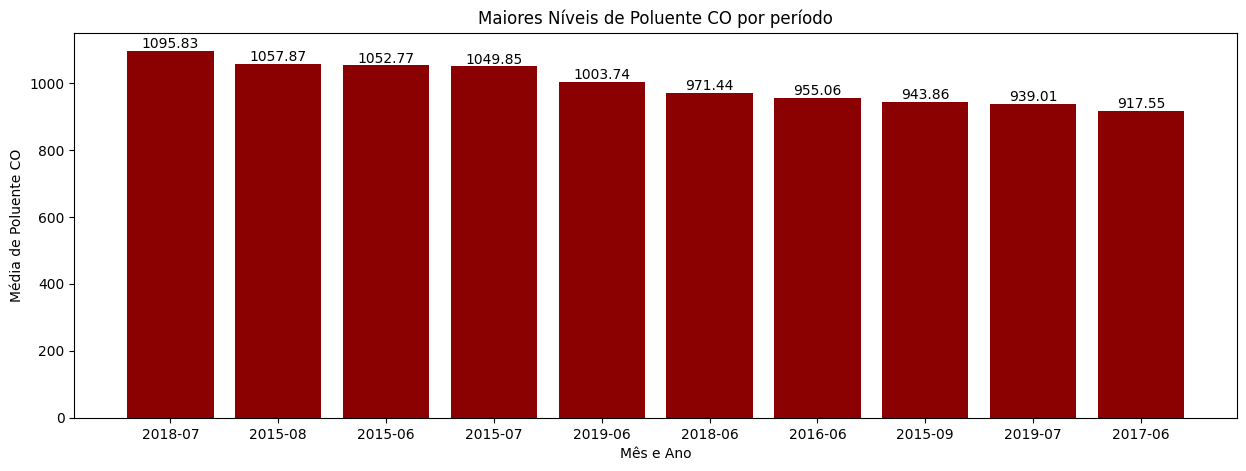

In [17]:
#Gráfico dos 10 Períodos com maior nível de concentração de CO
# Definir tamanho e largura das colunas e gráfico
fig, ax = plt.subplots(figsize=(15,5))


# Criar o gráfico de barras
plt.bar(maior_periodo_ano.index, maior_periodo_ano, color='darkred')

# Inserir titulo no gráfico
plt.title('Maiores Níveis de Poluente CO por período')

#Adicionar rótulos aos eixos
plt.xlabel('Mês e Ano')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(maior_periodo_ano):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [18]:
#10 Períodos com menor nível de concentração de CO
menor_periodo_ano = df_CO.groupby('ano_mes') ['Valor'].mean()
menor_periodo_ano = menor_periodo_ano.sort_values(ascending = True).head(10)
menor_periodo_ano

,Valor
ano_mes,
2021-12,405.635641
2021-11,419.802236
2021-04,421.441726
2020-04,430.257767
2020-03,441.703211
2021-10,479.690589
2021-01,520.540168
2017-04,530.880729
2016-11,539.763479


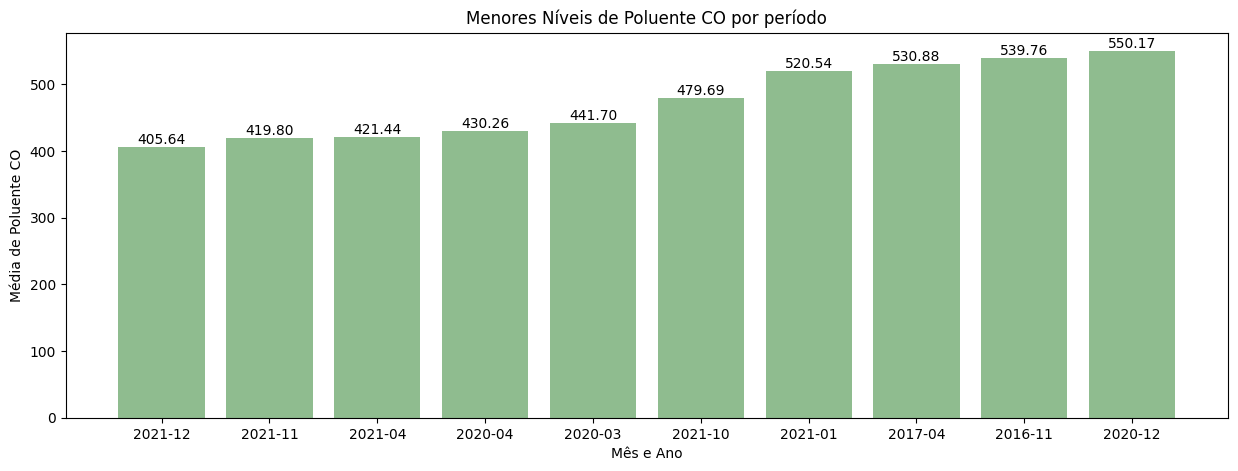

In [19]:
#Gráfico dos 10 Períodos com menor nível de concentração de CO

# Definir tamanho das colunas e gráfico
fig, ax = plt.subplots(figsize=(15,5))


# Criar o gráfico de barras
plt.bar(menor_periodo_ano.index, menor_periodo_ano, color='darkseagreen')

# Inserir titulo no gráfico
plt.title('Menores Níveis de Poluente CO por período')

#Adicionar rótulos aos eixos
plt.xlabel('Mês e Ano')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(menor_periodo_ano):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [20]:
#Horário de maior concentração de CO
periodo_hr = df_CO.groupby('Hora') ['Valor'].mean()
periodo_hr

,Valor
Hora,
01:00,729.650516
02:00,645.233320
03:00,577.170172
04:00,529.737263
05:00,534.081414
06:00,603.787915
07:00,771.617597
08:00,900.372279
09:00,858.429140


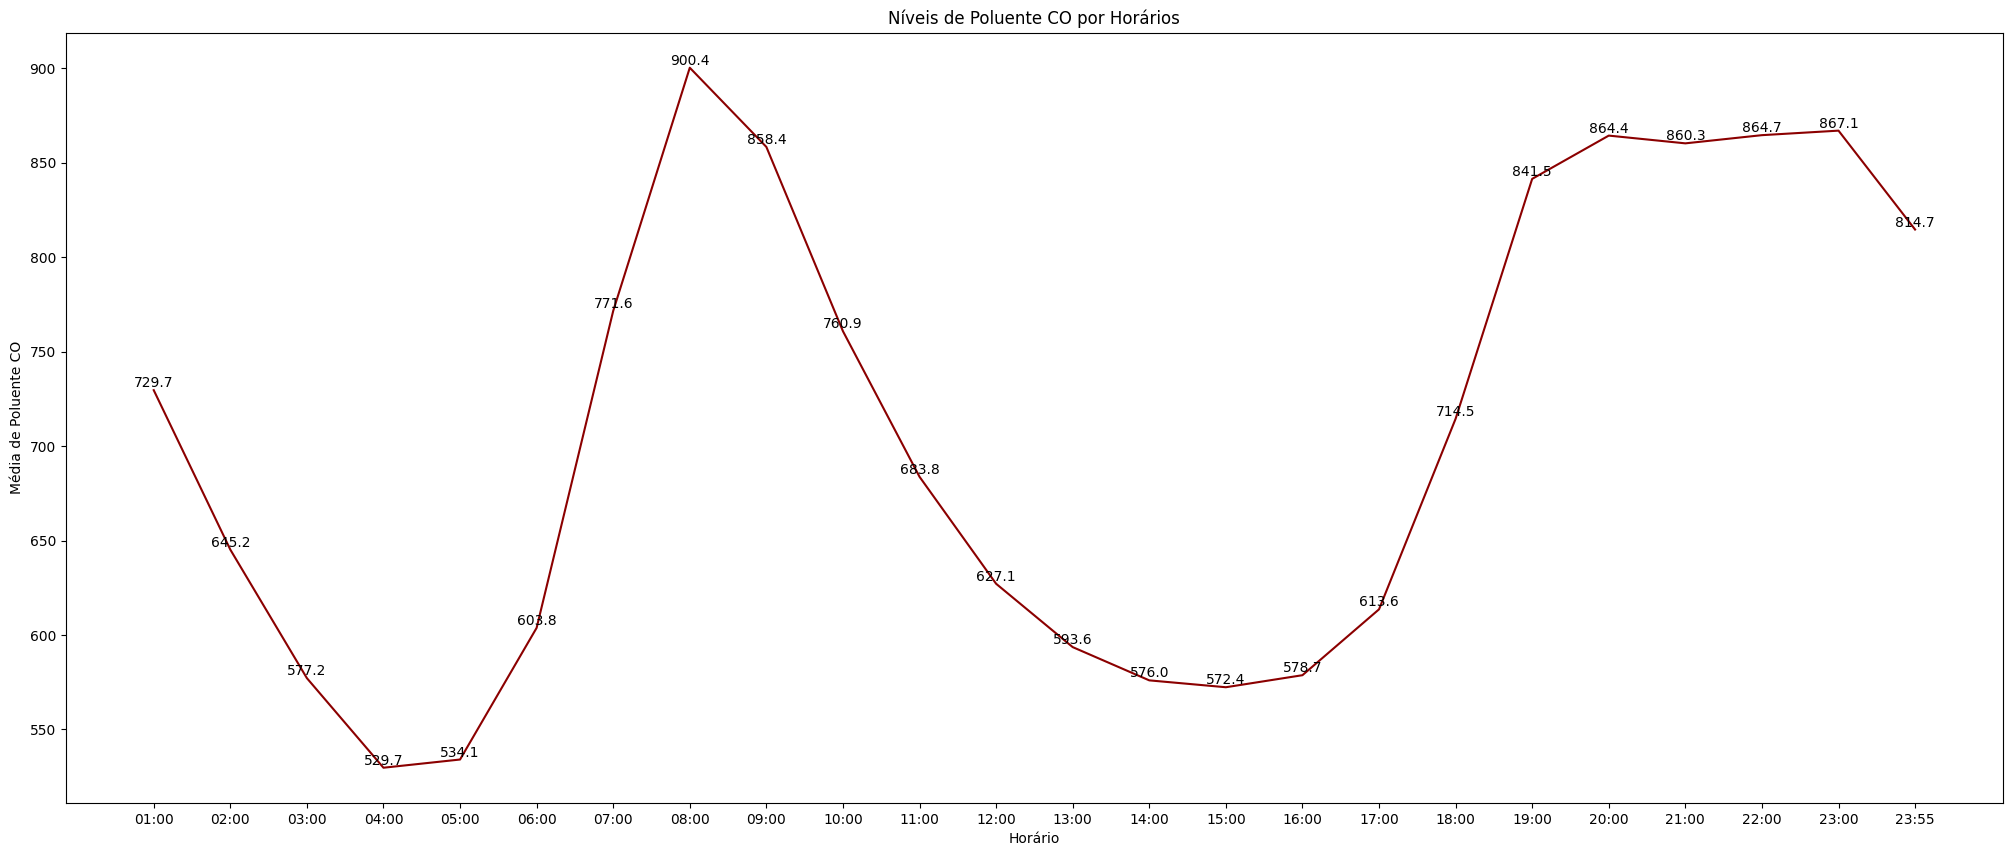

In [21]:
# Definir tamanho e largura das colunas e gráfico
fig, ax = plt.subplots(figsize=(25,10))


# Criar o gráfico de barras
plt.plot(periodo_hr.index, periodo_hr, color='darkred')

# Inserir titulo no gráfico
plt.title('Níveis de Poluente CO por Horários')

#Adicionar rótulos aos eixos
plt.xlabel('Horário')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(periodo_hr):
    plt.text(i, valor, f'{valor:.1f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()


In [22]:
# nível de concentração de CO por ano
df_CO['ano'] = df_CO['Data'].str.slice(0,4)
concentracao_ano = df_CO.groupby('ano') ['Valor'].mean()
concentracao_ano

<ipython-input-22-6a9ba647818a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CO['ano'] = df_CO['Data'].str.slice(0,4)


,Valor
ano,
2015,872.611145
2016,719.428975
2017,686.583548
2018,711.192829
2019,724.014846
2020,636.330846
2021,591.284089


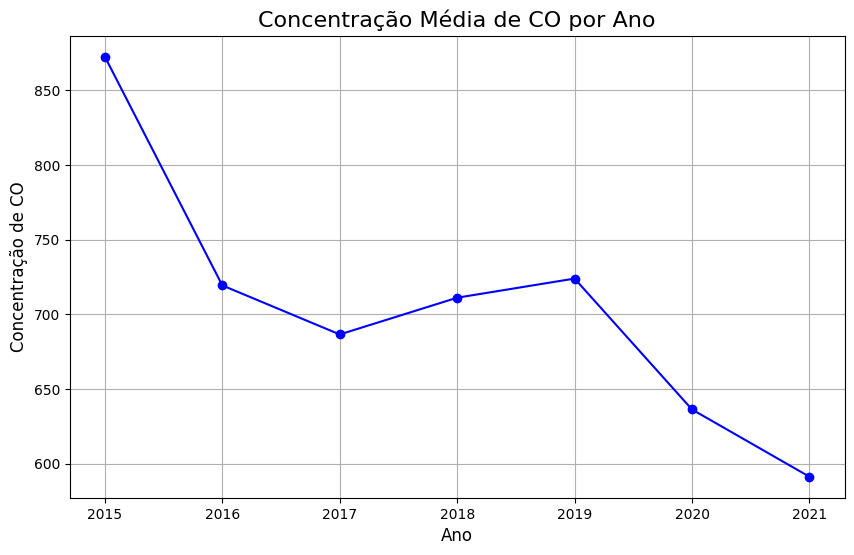

In [23]:
# Gera o gráfico de linha
plt.figure(figsize=(10,6))  # Ajusta o tamanho da figura
plt.plot(concentracao_ano.index, concentracao_ano.values, marker='o', linestyle='-', color='b')

# Adiciona título e rótulos aos eixos
plt.title('Concentração Média de CO por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Concentração de CO', fontsize=12)

# Gera grade no gráfico
plt.grid(True)

# Exibe o gráfico
plt.show()

In [24]:
!pip install statsmodels

In [25]:
from statsmodels.tsa.stattools import adfuller

# Executa o teste ADF na série temporal de concentração de CO por ano
resultado_adf = adfuller(concentracao_ano)

# Exibe os resultados
print("Estatística ADF:", resultado_adf[0])
print("p-valor:", resultado_adf[1])
print("Valores críticos:")
for key, value in resultado_adf[4].items():
    print(f'   {key}: {value}')

# Interpretação do resultado
if resultado_adf[1] < 0.05:
    print("\nA série temporal é estacionária (Rejeita-se a hipótese nula).")
else:
    print("\nA série temporal NÃO é estacionária (Não se rejeita a hipótese nula).")

Estatística ADF: -2.2255672518359053
p-valor: 0.19709721070286135
Valores críticos:
   1%: -5.354256481481482
   5%: -3.6462381481481483
   10%: -2.901197777777778

A série temporal NÃO é estacionária (Não se rejeita a hipótese nula).
